In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/DOGE-USD.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [3]:
df.shape

(1761, 7)

Data Checks to perform
1) Check Missing values
2) Check Duplicates
3) Check data type
4) Check the number of unique values of each column
5) Check statistics of data set
6) Check various categories present in the different categorical column

In [4]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [9]:
df.nunique()

Date         1761
Open         1535
High         1538
Low          1527
Close        1544
Adj Close    1544
Volume       1761
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,0.059541,0.063060,0.056094,0.059586,0.059586,1.015681e+09
std,0.101307,0.109131,0.093678,0.101360,0.101360,3.563069e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.002548,0.002616,0.002499,0.002547,0.002547,2.297475e+07
50%,0.003474,0.003600,0.003354,0.003490,0.003490,8.979000e+07
75%,0.070618,0.074986,0.068462,0.070621,0.070621,6.557827e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Insight
1) From above description of numerical data, all means are very close to each other - between 0.56 and 1;
2) All standard deviations are also close 


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

We have 1 categorical features : ['Date']


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1761 non-null   datetime64[ns]
 1   Open       1761 non-null   float64       
 2   High       1761 non-null   float64       
 3   Low        1761 non-null   float64       
 4   Close      1761 non-null   float64       
 5   Adj Close  1761 non-null   float64       
 6   Volume     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 96.4 KB


In [21]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df = df.drop(columns = ['Date'])

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0,2017,11,9
1,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0,2017,11,10
2,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0,2017,11,11
3,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0,2017,11,12
4,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0,2017,11,13


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import warnings

In [30]:
X = df.drop(columns=['Volume'],axis=1)

In [31]:
y = df.Volume

In [32]:
X

,Open,High,Low,Close,Adj Close,year,month,day
0,0.001207,0.001415,0.001181,0.001415,0.001415,2017,11,9
1,0.001421,0.001431,0.001125,0.001163,0.001163,2017,11,10
2,0.001146,0.001257,0.001141,0.001201,0.001201,2017,11,11
3,0.001189,0.001210,0.001002,0.001038,0.001038,2017,11,12
4,0.001046,0.001212,0.001019,0.001211,0.001211,2017,11,13
...,...,...,...,...,...,...,...,...
1756,0.061534,0.063333,0.061058,0.061330,0.061330,2022,8,31
1757,0.061336,0.062479,0.060194,0.062372,0.062372,2022,9,1
1758,0.062372,0.062712,0.060947,0.061635,0.061635,2022,9,2
1759,0.000000,0.000000,0.000000,0.000000,0.000000,2022,9,3


In [33]:
y

0         6259550.0
1         4246520.0
2         2231080.0
3         3288960.0
4         2481270.0
           ...     
1756    309748693.0
1757    328765413.0
1758    273453013.0
1759            0.0
1760    297513408.0
Name: Volume, Length: 1761, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1408, 8), (353, 8))

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1604554706.8533
- Mean Absolute Error: 524604872.9871
- R2 Score: 0.8068
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2185295897.0215
- Mean Absolute Error: 648581525.5261
- R2 Score: 0.5294


Lasso
Model performance for Training set
- Root Mean Squared Error: 1606590145.0953
- Mean Absolute Error: 521249413.8886
- R2 Score: 0.8063
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2181207272.8917
- Mean Absolute Error: 644886781.0387
- R2 Score: 0.5311


Ridge
Model performance for Training set
- Root Mean Squared Error: 2631450771.5043
- Mean Absolute Error: 984978156.0948
- R2 Score: 0.4803
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2238588609.0717
- Mean Absolute Error: 924562511.4809
- R2 Score: 0.5061


K-Neighbors Regressor
Model performance for Training set
- Ro

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.696348
5,Random Forest Regressor,0.675952
3,K-Neighbors Regressor,0.653278
1,Lasso,0.531136
0,Linear Regression,0.529376
2,Ridge,0.506142
4,Decision Tree,0.440852
7,AdaBoost Regressor,0.228535


In [39]:
xgb_model = XGBRegressor()
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 69.63


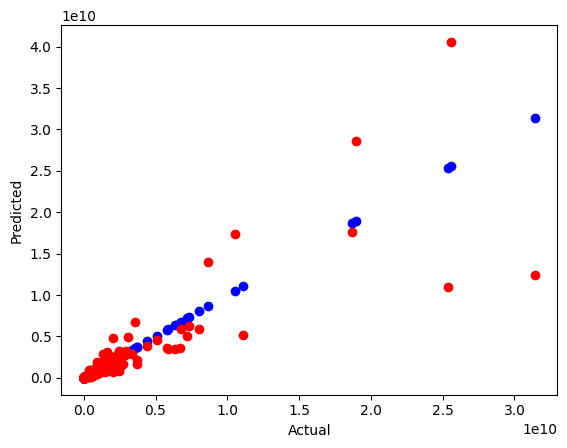

In [42]:
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual');
plt.ylabel('Predicted');